### imports

In [32]:
import pandas as pd
from transformers import ViTImageProcessor, ViTModel, ViTImageProcessorFast
import chromadb
from chromadb import Documents, EmbeddingFunction, Embeddings
from chromadb.utils.data_loaders import ImageLoader
from IPython.display import Image

### Workbook to demonstrate querying a ChromaDB

## †he custom embedding class

In [33]:
class GoogleVITHuge224Embedding(EmbeddingFunction):

    '''
    A class to provide custom embeddings to a ChromaDB database
    embedding images using the Google vit-huge-patch14-224-in21k
    the class returns an embedding as a numpy array
    '''


    def __call__(self, input: Documents) -> Embeddings:

        #Instantiate the image. Convert it to 244 x 244 and normalise RGB between 0 and 1 witha mean of 0.5 for each channel

        self.feature_extractor = ViTImageProcessorFast.from_pretrained('google/vit-huge-patch14-224-in21k')

        #Instantiate the Google ViT with pretrained weights

        self.model = ViTModel.from_pretrained('google/vit-huge-patch14-224-in21k')#Preprocess the data

        inputs = self.feature_extractor(images=input, return_tensors="pt")

        #Embedd the data

        outputs = self.model(**inputs)

        #Convert the embedding to a Numpy array and take the first vector of the Transformer state

        embeddings = outputs.last_hidden_state.data.numpy()[0,0]

        #return the embedding

        return embeddings

## ßetting up and performing the query

In [34]:
#instantiate the image loader that ChromaDB uses to load pictures

image_loader = ImageLoader()

#intantiate the custom embedding function

image_embbeding_function = GoogleVITHuge224Embedding()

#connect to the database

chroma_client = chromadb.PersistentClient(path='/Users/shogun/code/gwen-m97/inspiart/models/google_vit_sample1000_db')

#connect to the correct collection

images_db = chroma_client.get_or_create_collection(name="google_vit_sample1000_collection", embedding_function=image_embbeding_function, data_loader=image_loader)

#test picture string

#query_uris = '/Users/shogun/code/gwen-m97/raw_data/test_images/Two_Young_Girls_at_the_Piano_MET_rl1975.1.201.R.jpg'
query_uris = '/Users/shogun/code/gwen-m97/raw_data/test_images/Piet_Mondriaan,_1942_-_New_York_City_I.jpg'
#query_uris = '/Users/shogun/code/gwen-m97/raw_data/test_images/Paul_Cézanne_-_The_Basket_of_Apples_-_1926.252_-_Art_Institute_of_Chicago.jpg'
#query_uris = '/Users/shogun/code/gwen-m97/raw_data/test_images/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg'

#perform the query

image_suggestions = images_db.query(
    query_uris=[query_uris], include=['uris','metadatas']
)


/var/folders/1r/626773hx3mbf2w_31tdjwv6m0000gn/T/ipykernel_71398/2967970814.py:7: DeprecationWarning: The class GoogleVITHuge224Embedding does not implement __init__. This will be required in a future version.
  image_embbeding_function = GoogleVITHuge224Embedding()
Fetching 1 files: 100%|██████████| 1/1 [00:00<00:00, 19691.57it/s]


In [9]:
image_suggestions

{'ids': [['139626-portrait-of-oscar-miestchaninoff-1913.jpg',
   '128904-la-parade-1930.jpg',
   '112993-the-card-players-1892.jpg',
   '131328-the-descent-from-the-cross-1917.jpg',
   '154520-sitting-nude-1909.jpg',
   '122283-reclining-woman-c-1900.jpg',
   '114881-the-brothel-1887.jpg',
   '132450-carnival-in-a-village.jpg',
   '118319-tall-nude-also-known-as-woman-nude-standing-1906.jpg',
   '127139-self-portrait.jpg']],
 'embeddings': None,
 'documents': None,
 'uris': [['/Users/shogun/code/gwen-m97/raw_data/sample1000/139626-portrait-of-oscar-miestchaninoff-1913.jpg',
   '/Users/shogun/code/gwen-m97/raw_data/sample1000/128904-la-parade-1930.jpg',
   '/Users/shogun/code/gwen-m97/raw_data/sample1000/112993-the-card-players-1892.jpg',
   '/Users/shogun/code/gwen-m97/raw_data/sample1000/131328-the-descent-from-the-cross-1917.jpg',
   '/Users/shogun/code/gwen-m97/raw_data/sample1000/154520-sitting-nude-1909.jpg',
   '/Users/shogun/code/gwen-m97/raw_data/sample1000/122283-reclining-wom

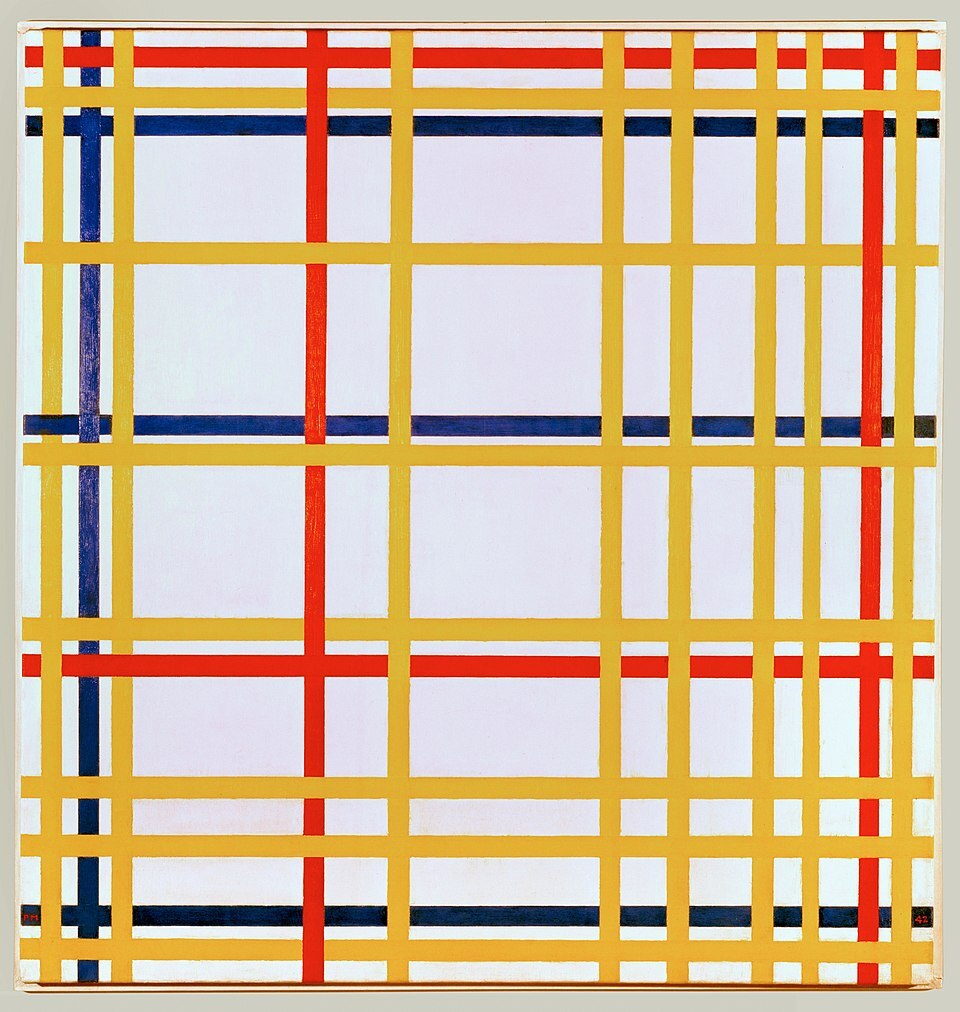

In [35]:
Image('/Users/shogun/code/gwen-m97/raw_data/test_images/Piet_Mondriaan,_1942_-_New_York_City_I.jpg')

In [36]:
Image(url=f"{image_suggestions['metadatas'][0][0]['img']}")

In [37]:
Image(url=f"{image_suggestions['metadatas'][0][1]['img']}")

In [38]:
Image(url=f"{image_suggestions['metadatas'][0][2]['img']}")

In [39]:
Image(url=f"{image_suggestions['metadatas'][0][3]['img']}")

In [40]:
Image(url=f"{image_suggestions['metadatas'][0][4]['img']}")

In [41]:
Image(url=f"{image_suggestions['metadatas'][0][5]['img']}")

In [42]:
Image(url=f"{image_suggestions['metadatas'][0][6]['img']}")

In [43]:
Image(url=f"{image_suggestions['metadatas'][0][7]['img']}")

In [44]:
Image(url=f"{image_suggestions['metadatas'][0][8]['img']}")

In [45]:
Image(url=f"{image_suggestions['metadatas'][0][9]['img']}")

In [28]:
images_db.count()

981

In [27]:
image_suggestions['uris'][0][9]

'/Users/shogun/code/gwen-m97/raw_data/sample1000/116587-near-saint-malo.jpg'